# Data Set Exploration

In [191]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# `news.csv` Data Set

There are 4 columns: 

- article id
- article title
- article text
- lable
 
How many rows? What does the data look like?

In [192]:
#Read the data
df=pd.read_csv('data/news.csv')

#Get shape and head
shape = df.shape
print(f"shape of the dataset: {shape} \n")

df.head(10)

shape of the dataset: (6335, 4) 



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear Smell,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


# Explore the character and word count distributions 

In [65]:
df['text_len'] = df['text'].str.len()
df['text_cnt'] = df['text'].str.count(' ') + 1
df.sort_values('text_len').head(10)

,Unnamed: 0,title,text,label,text_len,text_cnt
806,9314,Southern Poverty Law Center Targets Anti-Jihad...,,FAKE,1,2
6175,7043,Hillary’s High Crimes & Misdemeanors Threaten ...,,FAKE,1,2
5088,8875,Huma Abedin’s Muslim Dad,,FAKE,1,2
4253,8601,Pro-sovereignty Legislators Demand That Admini...,,FAKE,1,2
1664,5802,Alert News : Putins Army Is Coming For World W...,,FAKE,1,2
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,FAKE,1,2
4713,8626,World War 3?,,FAKE,1,2
5772,5324,Huma’s Weiner Dogs Hillary,,FAKE,1,2
5581,6800,Automation: Robots from Korea to America Are R...,,FAKE,1,2
919,10304,Refugee Resettlement Watch: Swept Away In Nort...,,FAKE,1,2


In [66]:
max_text_len = max(df.text_len)
min_text_len = min(df.text_len)
max_freq_text_len = df.text_len.value_counts().max()
min_freq_text_len = df.text_len.value_counts().min()
cnt_distinct_text_len = df.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 115848
    min(text_len): 1 
    max(freq_text_len): 59
    min(freq_text_len): 1
    count(distinct freq_text_len): 4586



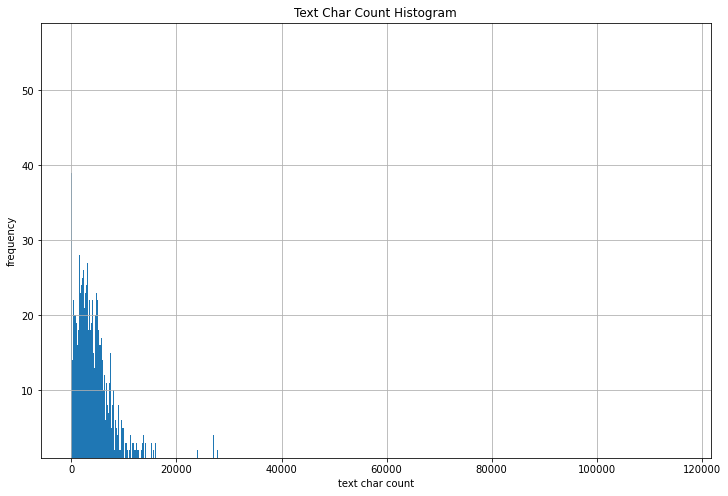

In [45]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df.text_len, bins=bins)
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

# Fake Vs. Real

In [67]:
filter = df['label'] == 'REAL'
df_real = df[filter]
df_real

,Unnamed: 0,title,text,label,text_len,text_cnt
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2559,423
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1860,307
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,783,123
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,13981,2288
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,4332,692
...,...,...,...,...,...,...
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,1832,283
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,2226,362
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4124,629
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,7043,1093


In [69]:
filter = df['label'] == 'FAKE'
df_fake = df[filter]
df_fake

,Unnamed: 0,title,text,label,text_len,text_cnt
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7549,1298
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2654,446
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2673,404
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE,13363,2348
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,3177,553
...,...,...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,3095,489
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,1,2
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,2585,412
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14343,2183


# Character count

In [72]:
max_text_len = max(df_real.text_len)
min_text_len = min(df_real.text_len)
max_freq_text_len = df_real.text_len.value_counts().max()
min_freq_text_len = df_real.text_len.value_counts().min()
cnt_distinct_text_len = df_real.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 44145
    min(text_len): 43 
    max(freq_text_len): 58
    min(freq_text_len): 1
    count(distinct freq_text_len): 2608



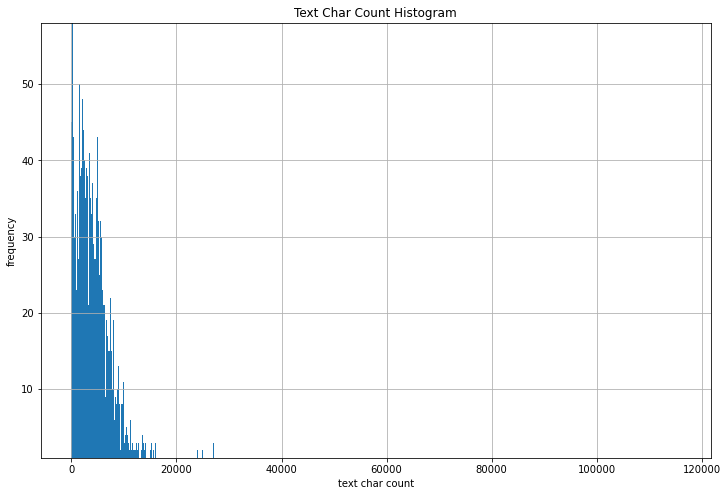

In [73]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df.text_len, bins=bins)
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

In [74]:
max_text_len = max(df_fake.text_len)
min_text_len = min(df_fake.text_len)
max_freq_text_len = df_fake.text_len.value_counts().max()
min_freq_text_len = df_fake.text_len.value_counts().min()
cnt_distinct_text_len = df_fake.text_len.nunique()

print("""
    max(text_len): {0}
    min(text_len): {1} 
    max(freq_text_len): {2}
    min(freq_text_len): {3}
    count(distinct freq_text_len): {4}
""".format(max_text_len, min_text_len, max_freq_text_len, min_freq_text_len, cnt_distinct_text_len))


    max(text_len): 115848
    min(text_len): 1 
    max(freq_text_len): 36
    min(freq_text_len): 1
    count(distinct freq_text_len): 2532



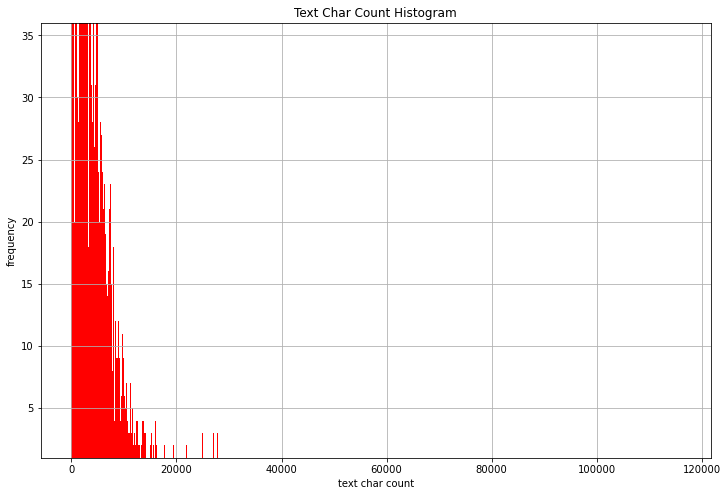

In [76]:
bins = cnt_distinct_text_len
plt.figure(figsize=(12, 8))
plt.hist(df.text_len, bins=bins, color="red")
plt.ylim(min_freq_text_len, max_freq_text_len)
plt.xlabel('text char count')
plt.ylabel('frequency')
plt.title('Text Char Count Histogram')
plt.grid(True)
plt.show()

# Word count

In [79]:
# label = REAL 
max_text_cnt = max(df_real.text_cnt)
min_text_cnt = min(df_real.text_cnt)
max_freq_text_cnt = df_real.text_cnt.value_counts().max()
min_freq_text_cnt = df_real.text_cnt.value_counts().min()
cnt_distinct_text_cnt = df_real.text_cnt.nunique()

print("""
    max(text_cnt): {0}
    min(text_cnt): {1} 
    max(freq_text_cnt): {2}
    min(freq_text_cnt): {3}
    count(distinct freq_text_cnt): {4}
""".format(max_text_cnt, min_text_cnt, max_freq_text_cnt, min_freq_text_cnt, cnt_distinct_text_cnt))


    max(text_cnt): 7546
    min(text_cnt): 7 
    max(freq_text_cnt): 73
    min(freq_text_cnt): 1
    count(distinct freq_text_cnt): 1470



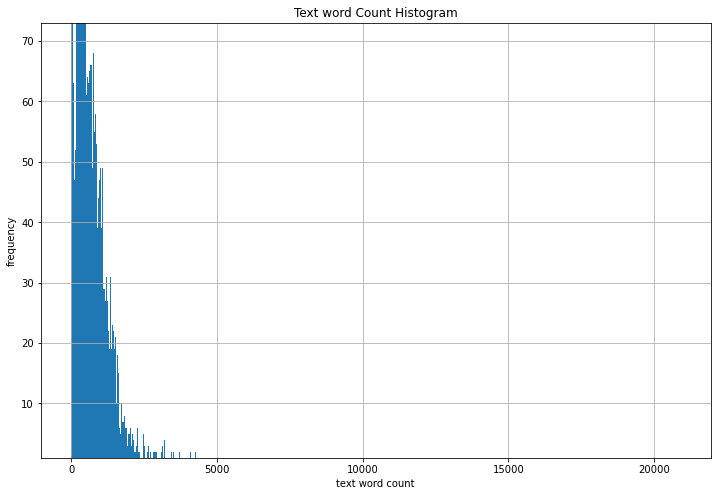

In [81]:
bins = cnt_distinct_text_cnt
plt.figure(figsize=(12, 8))
plt.hist(df.text_cnt, bins=bins)
plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

In [82]:
# label = FAKE 
max_text_cnt = max(df_fake.text_cnt)
min_text_cnt = min(df_fake.text_cnt)
max_freq_text_cnt = df_fake.text_cnt.value_counts().max()
min_freq_text_cnt = df_fake.text_cnt.value_counts().min()
cnt_distinct_text_cnt = df_fake.text_cnt.nunique()

print("""
    max(text_cnt): {0}
    min(text_cnt): {1} 
    max(freq_text_cnt): {2}
    min(freq_text_cnt): {3}
    count(distinct freq_text_cnt): {4}
""".format(max_text_cnt, min_text_cnt, max_freq_text_cnt, min_freq_text_cnt, cnt_distinct_text_cnt))


    max(text_cnt): 20897
    min(text_cnt): 2 
    max(freq_text_cnt): 36
    min(freq_text_cnt): 1
    count(distinct freq_text_cnt): 1359



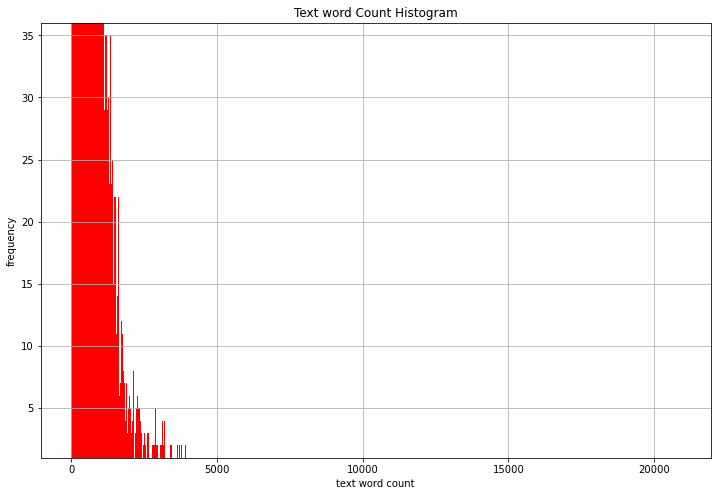

In [84]:
bins = cnt_distinct_text_cnt
plt.figure(figsize=(12, 8))
plt.hist(df.text_cnt, bins=bins, color="red")
plt.ylim(min_freq_text_cnt, max_freq_text_cnt)
plt.xlabel('text word count')
plt.ylabel('frequency')
plt.title('Text word Count Histogram')
plt.grid(True)
plt.show()

# Calculate the min and max character and word counts for title and text columns.

In [94]:
title_char_max  = df.title.str.len().max()
title_char_min  = df.title.str.len().min()
title_word_max  = (df.title.str.count(' ') + 1).max()
title_word_min  = (df.title.str.count(' ') + 1).min()

print("""
    title_char_max: {0}
    title_char_min: {1}
    title_word_max: {2}
    title_word_min: {3}
""".format(title_char_max, title_char_min, title_word_max, title_word_min))


    title_char_max: 289
    title_char_min: 1
    title_word_max: 53
    title_word_min: 1



In [95]:
text_char_max  = df.text.str.len().max()
text_char_min  = df.text.str.len().min()
text_word_max  = (df.text.str.count(' ') + 1).max()
text_word_min  = (df.text.str.count(' ') + 1).min()

print("""
    text_char_max: {0}
    text_char_min: {1}
    text_word_max: {2}
    text_word_min: {3}
""".format(text_char_max, text_char_min, text_word_max, text_word_min))


    text_char_max: 115848
    text_char_min: 1
    text_word_max: 20897
    text_word_min: 2



# Calculate the total number of distinct words across all articles. 
# Note the difference between the max words in the text and the total number of unique words in the dataset.

In [204]:
# Total # of words
df['text_cnt'] = df.text.str.count(' ') + 1

# Total # of unique words (Is there better way remove special characters from text?)
df['cnt_distinct_word'] = df.text.str.replace('[(,“,),%,$,+,.,\,,@,—,‘,’,!]', '').str.lower().str.strip().str.split(' ')
df['cnt_distinct_word'] = [len(set(word)) for word in df.cnt_distinct_word]

# Difference
df['diff'] = df['text_cnt']-df['cnt_distinct_word']
df

,Unnamed: 0,title,text,label,cnt_distinct_word,text_cnt,diff
0,8476,You Can Smell Hillary’s Fear Smell,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,554,1298,744
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,277,446,169
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,237,423,186
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,249,404,155
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,176,307,131
...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,276,629,353
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1028,2183,1155
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,768,1910,1142
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,544,1093,549
